# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.qdict = {}

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring
    
    def get_q(self, s, a):
        
        key = (s, a)
        if key in self.qdict:
            value = self.qdict[key]
        else:
            value = 0
            self.qdict[key] = value
        return value
    
    def set_q(self, s, a, value):
        key = (s, a)
        self.qdict[key] = value
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
        
        ## TODO 2
        ## Implement epsilon greedy policy here
        
        if np.random.random() <= self.epsilon:
            
            index = np.random.randint(self.num_actions)
            action = self.actions[index]
            
        else:
            
            values = []
            stateStr = self.stateToString(state)      

            values = [self.get_q(stateStr, action) for action in self.actions]
            maxval = np.max(values)
            
            max_indexes = np.where(values == maxval)[0]

            action = np.random.choice(max_indexes)
        
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the q-learning update here
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """
        
        if done:
            
            return
        
        values = [self.get_q(state2Str, action) for action in self.actions]
        maxval = np.max(values)
            
        td_target = reward + self.gamma * maxval
        new_qvalue = self.get_q(state1Str, action1) + self.alpha * (td_target - self.get_q(state1Str, action1))
        self.set_q(state1Str, action1, new_qvalue) 
        
        

In [5]:
# interactive = True
# %matplotlib nbagg
# env = SimpleRoomsEnv()
# agent = QLearningAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_qlearning(10, interactive)

In [6]:
# interactive = False
# %matplotlib inline
# env = SimpleRoomsEnv()
# agent = QLearningAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_qlearning(50, interactive)

In [7]:
# interactive = True
# %matplotlib nbagg
# env = CliffWalkingEnv()
# agent = QLearningAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_qlearning(10, interactive)

Entering CliffWalkingEnv()


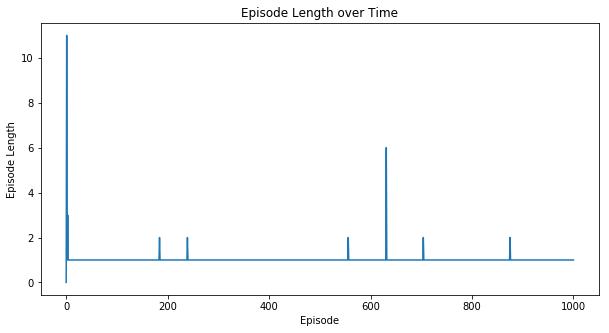

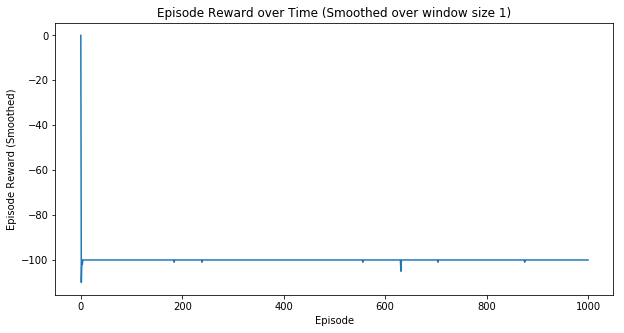

In [4]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(1000, interactive)

In [32]:
# interactive = True
# %matplotlib inline
# env = WindyGridworldEnv()
# agent = QLearningAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_qlearning(10, interactive)

In [27]:
# interactive = False
# %matplotlib inline
# env = WindyGridworldEnv()
# agent = QLearningAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_qlearning(50, interactive)